# Carga de datos y librerías

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics         import classification_report, confusion_matrix, recall_score, precision_score, f1_score, balanced_accuracy_score
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.compose         import ColumnTransformer
from sklearn.pipeline        import Pipeline
from sklearn.impute          import SimpleImputer
from sklearn.base            import clone
from sklearn.decomposition   import PCA
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from xgboost                 import XGBClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Trabajo de Grado/Heart_Data.csv')
df

,TP_DE_TROMBOPLASTINA,TP_DE_PROTROMBINA,INR,GLOBULOS_ROJOS,LEUCOCITOS,HEMOGLOBINA,PLAQUETAS,POTASIO,SODIO,CREATININA_EN_SUERO,...,PATOLOGICOS-ENFERMEDAD_CORONARIA,PATOLOGICOS-DISLIPIDEMIA,PATOLOGICOS-TABAQUISMO,PATOLOGICOS-OBESIDAD,PATOLOGICOS-H.T.A,PATOLOGICOS-DIABETES,PATOLOGICOS-TRASTORNOS_PULMONARES,PATOLOGICOS-INSUFICIENCIA_RENAL,TOXICOS-TOXICO_TIPO_1,SCA
0,27.7,11.7,1.08,4.85,11.28,14.4,253.0,3.41,141.2,1.10,...,1,1,1,0,1,1,0,0,0,1
1,27.4,11.0,1.01,4.42,6.87,11.8,211.0,4.11,139.8,0.82,...,0,0,0,0,1,0,0,0,0,0
2,28.5,12.0,1.11,5.92,7.24,16.9,219.0,3.71,139.9,0.75,...,1,1,0,0,1,1,0,0,0,1
3,30.4,11.2,1.04,4.61,9.71,13.8,341.0,4.09,140.0,0.73,...,1,1,0,0,1,0,0,0,0,1
4,25.2,10.7,1.02,5.39,11.23,17.6,270.0,4.10,140.0,0.93,...,1,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,22.0,10.3,0.94,4.98,11.88,15.4,273.0,3.09,136.6,0.52,...,1,1,0,1,1,1,0,0,0,0
855,29.3,13.0,1.21,5.06,9.70,15.4,200.0,4.46,136.4,0.94,...,1,1,1,0,1,1,0,0,0,1
856,30.0,10.4,0.95,4.37,12.92,13.4,225.0,4.07,141.0,0.65,...,0,1,1,0,0,1,0,0,0,1
857,25.7,9.9,0.90,4.75,7.35,14.0,337.0,4.39,138.5,0.88,...,0,0,0,0,1,0,0,0,0,0


# Análisis exploratorio (EDA)



* Visualizamos las distribuciones de las variables para ver diferencias entre pacientes sanos Vs pacientes con sca
* Mostramos algunos estadísticos (promedios y cuartiles)

### Variable objetivo

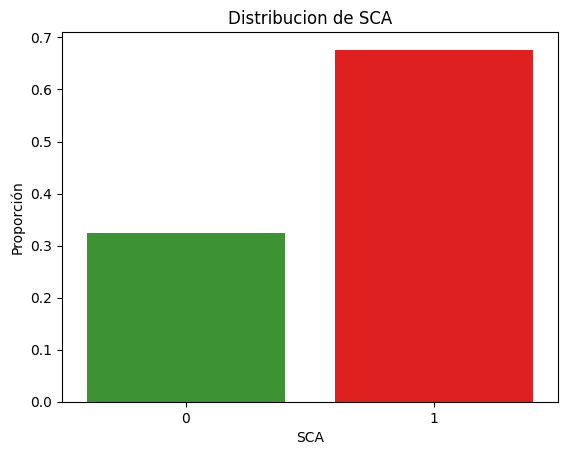

In [ ]:
sns.countplot(data=df, x='SCA', hue='SCA', palette={0: '#30A324', 1: 'red'}, legend=False, stat='proportion')
plt.title('Distribucion de SCA')
plt.ylabel('Proporción')
plt.show()

### Variable sexo

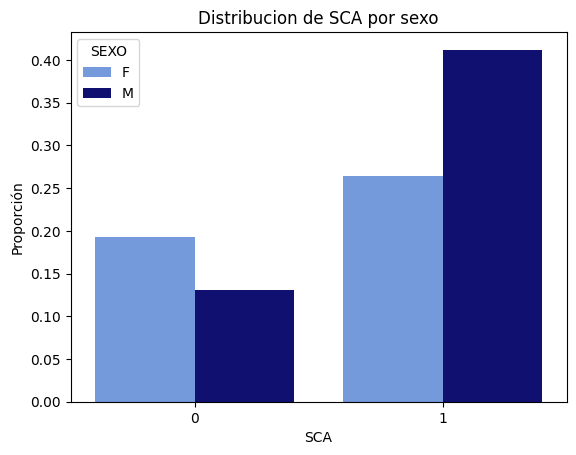

In [ ]:
sns.countplot(data=df, x='SCA', hue='SEXO', stat='proportion', palette=['cornflowerblue','navy'])
plt.title('Distribucion de SCA por sexo')
plt.ylabel('Proporción')
plt.show()

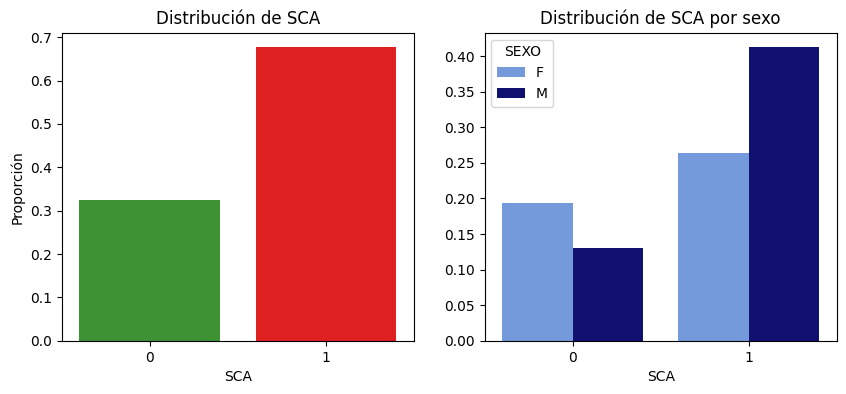

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x='SCA', hue='SCA', palette={0: '#30A324', 1: 'red'}, legend=False, stat='proportion')
plt.title('Distribución de SCA')
plt.ylabel('Proporción')

plt.subplot(1,2,2)
sns.countplot(data=df, x='SCA', hue='SEXO', stat='proportion', palette=['cornflowerblue','navy'])
plt.title('Distribución de SCA por sexo')
plt.ylabel(' ')

plt.show()

### Variable Leucocitos

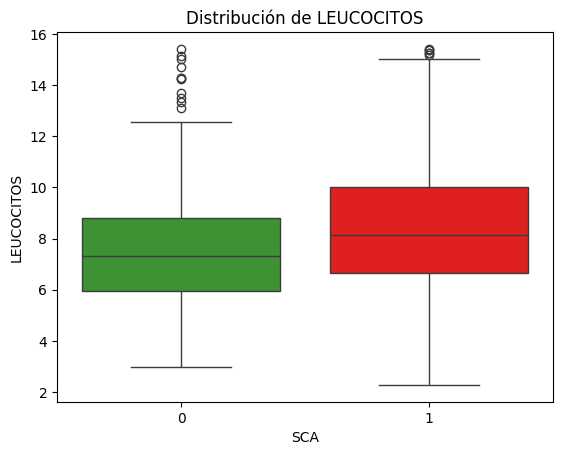

In [ ]:
sns.boxplot(data=df,x='SCA',y='LEUCOCITOS',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de LEUCOCITOS')
plt.show()

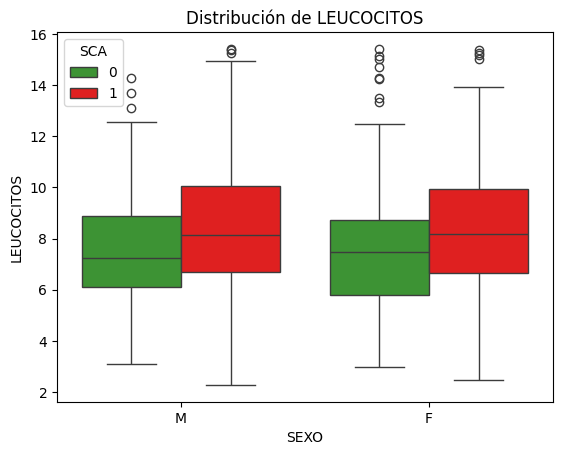

In [ ]:
sns.boxplot(data=df,x='SEXO',y='LEUCOCITOS',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de LEUCOCITOS')
plt.show()

In [ ]:
df.groupby(['SCA'])['LEUCOCITOS'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
SCA,,,,,,,,
0,278.0,7.6,2.4,3.0,5.9,7.3,8.8,15.4
1,581.0,8.5,2.6,2.3,6.6,8.2,10.0,15.4


### Variable Potasio

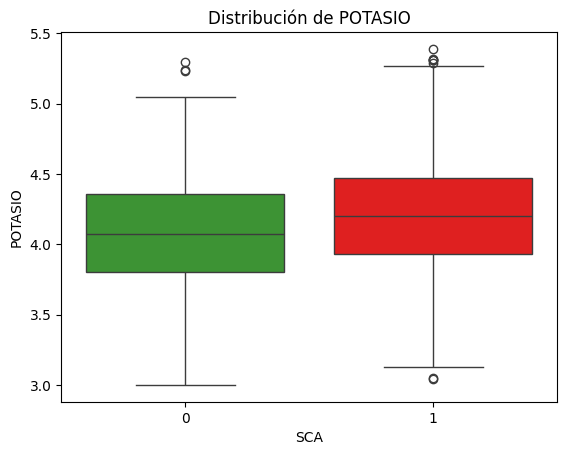

In [ ]:
sns.boxplot(data=df,x='SCA',y='POTASIO',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de POTASIO')
plt.show()

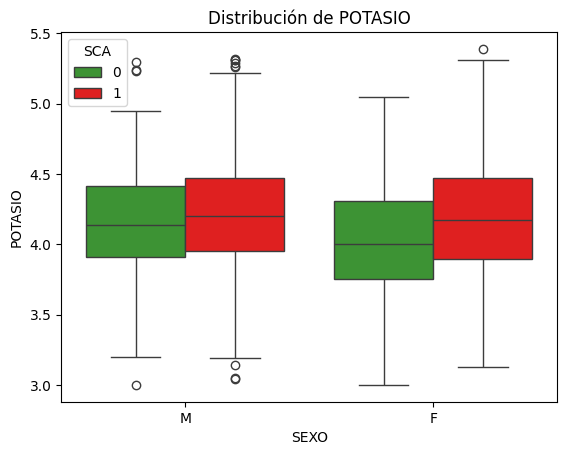

In [ ]:
sns.boxplot(data=df,x='SEXO',y='POTASIO',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de POTASIO')
plt.show()

In [ ]:
df.groupby(['SEXO','SCA'])['POTASIO'].describe().round(2)

count  mean   std   min   25%   50%   75%   max
SEXO SCA                                                 
F    0    166.0  4.02  0.40  3.00  3.75  4.00  4.31  5.05
     1    227.0  4.19  0.44  3.13  3.90  4.17  4.47  5.39
M    0    112.0  4.16  0.42  3.00  3.91  4.14  4.42  5.30
     1    354.0  4.23  0.41  3.04  3.95  4.20  4.47  5.32

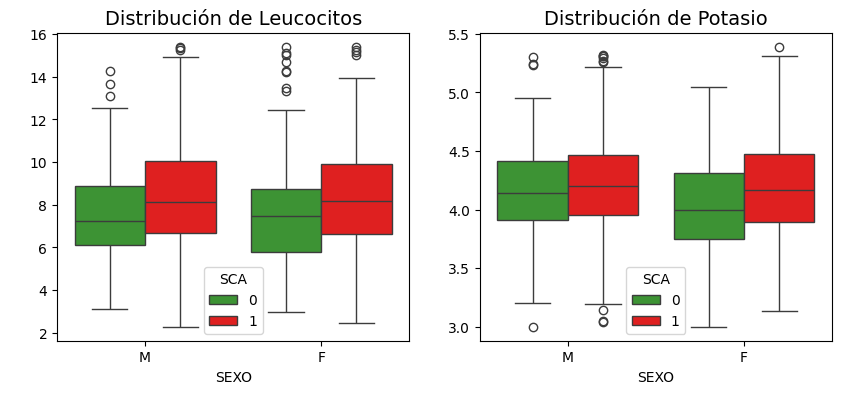

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='SEXO',y='LEUCOCITOS',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de Leucocitos',fontsize=14)
plt.ylabel(' ')

plt.subplot(1,2,2)
sns.boxplot(data=df,x='SEXO',y='POTASIO',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de Potasio',fontsize=14)
plt.ylabel(' ')

plt.show()

### Variable TROMBOPLASTINA

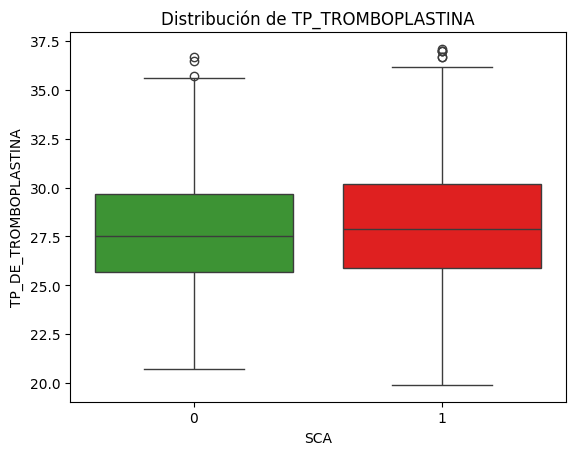

In [ ]:
sns.boxplot(data=df,x='SCA',y='TP_DE_TROMBOPLASTINA',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de TP_TROMBOPLASTINA')
plt.show()

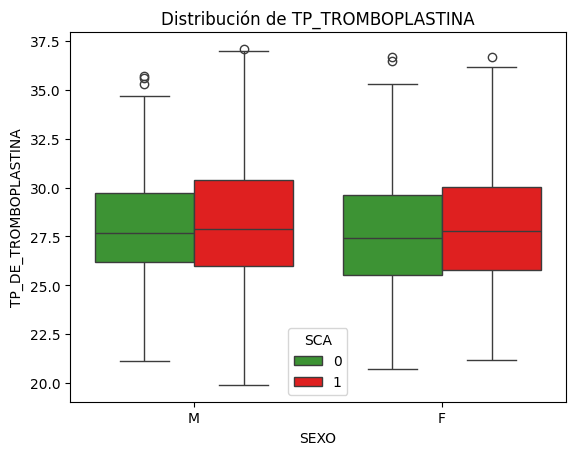

In [ ]:
sns.boxplot(data=df,x='SEXO',y='TP_DE_TROMBOPLASTINA',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de TP_TROMBOPLASTINA')
plt.show()

### Variable PROTROMBINA

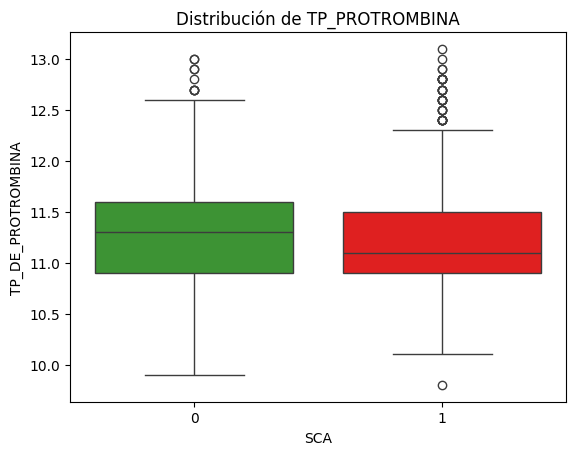

In [ ]:
sns.boxplot(data=df,x='SCA',y='TP_DE_PROTROMBINA',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de TP_PROTROMBINA')
plt.show()

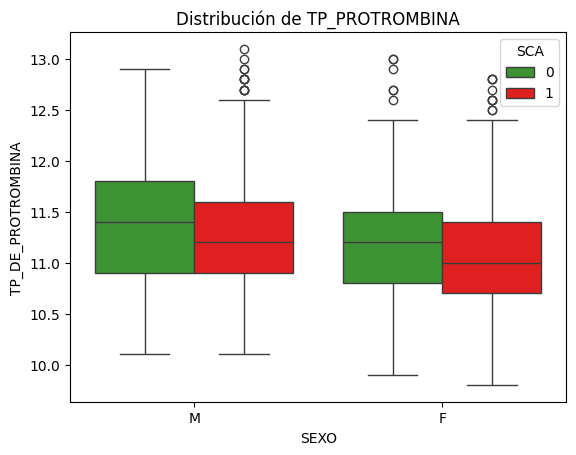

In [ ]:
sns.boxplot(data=df,x='SEXO',y='TP_DE_PROTROMBINA',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de TP_PROTROMBINA')
plt.show()

In [ ]:
df.groupby(['SEXO','SCA'])['TP_DE_PROTROMBINA'].describe()

count       mean       std   min   25%   50%   75%   max
SEXO SCA                                                          
F    0    166.0  11.216265  0.621270   9.9  10.8  11.2  11.5  13.0
     1    227.0  11.119824  0.609660   9.8  10.7  11.0  11.4  12.8
M    0    112.0  11.390179  0.610857  10.1  10.9  11.4  11.8  12.9
     1    354.0  11.269492  0.585593  10.1  10.9  11.2  11.6  13.1

### Variable INR

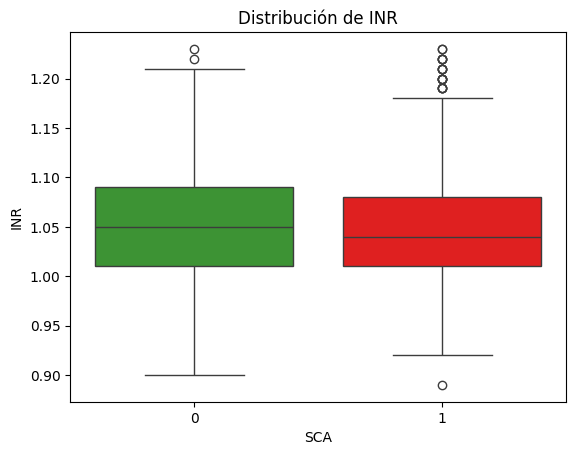

In [ ]:
sns.boxplot(data=df,x='SCA',y='INR',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de INR')
plt.show()

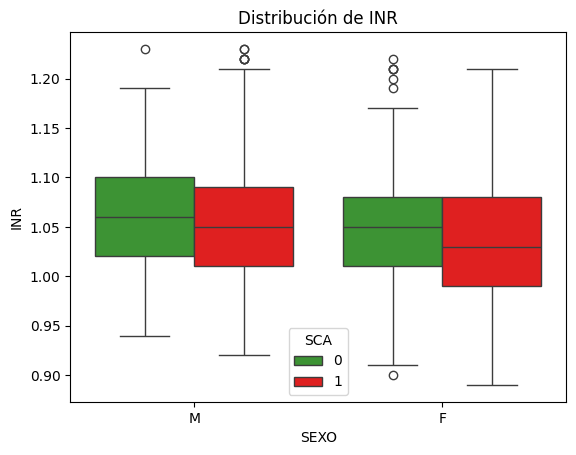

In [ ]:
sns.boxplot(data=df,x='SEXO',y='INR',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de INR')
plt.show()

In [ ]:
df.groupby(['SEXO','SCA'])['INR'].describe()

count      mean       std   min   25%   50%   75%   max
SEXO SCA                                                         
F    0    166.0  1.046747  0.063962  0.90  1.01  1.05  1.08  1.22
     1    227.0  1.039427  0.062493  0.89  0.99  1.03  1.08  1.21
M    0    112.0  1.063036  0.060565  0.94  1.02  1.06  1.10  1.23
     1    354.0  1.055141  0.061193  0.92  1.01  1.05  1.09  1.23

### Variable Globulos rojos

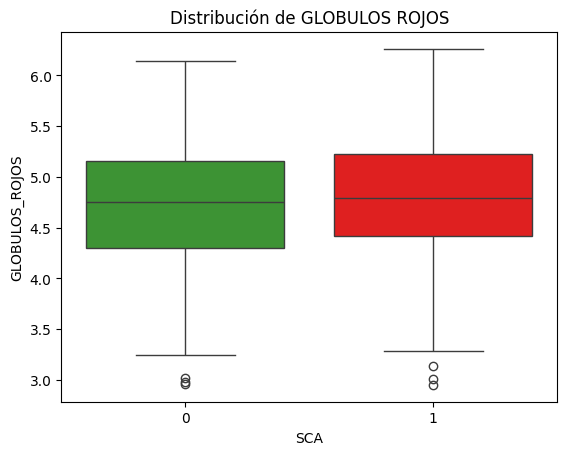

In [ ]:
sns.boxplot(data=df,x='SCA',y='GLOBULOS_ROJOS',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de GLOBULOS ROJOS')
plt.show()

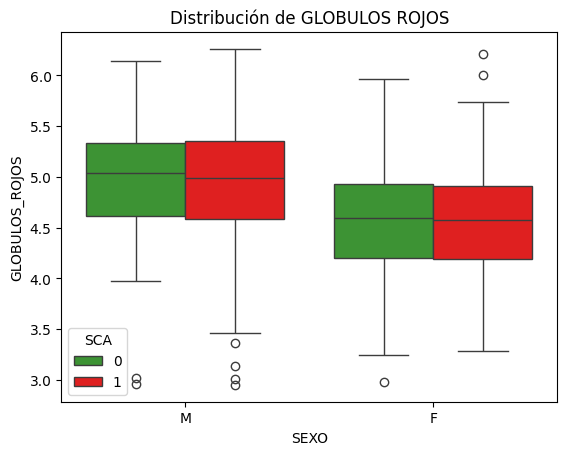

In [ ]:
sns.boxplot(data=df,x='SEXO',y='GLOBULOS_ROJOS',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de GLOBULOS ROJOS')
plt.show()

### Variable Hemoglobina

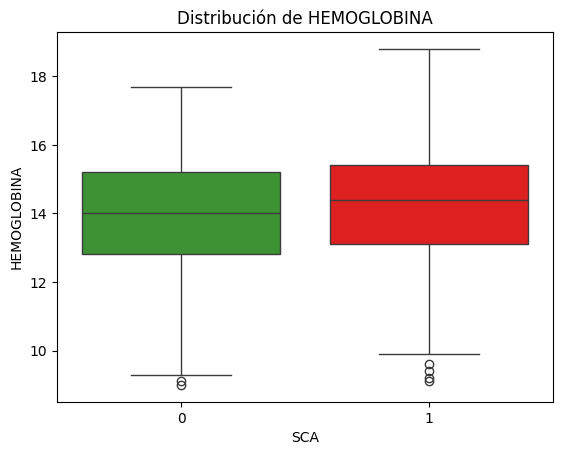

In [ ]:
sns.boxplot(data=df,x='SCA',y='HEMOGLOBINA',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de HEMOGLOBINA')
plt.show()

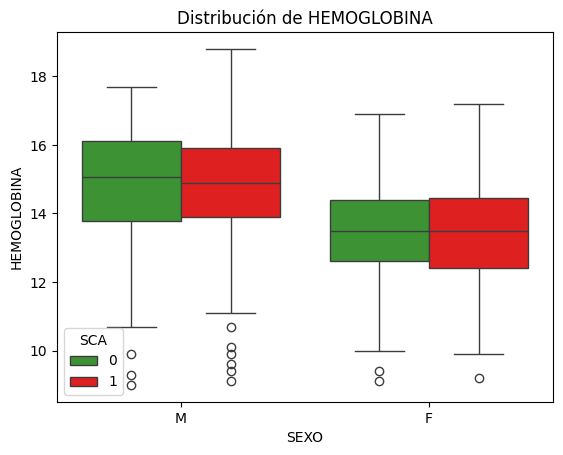

In [ ]:
sns.boxplot(data=df,x='SEXO',y='HEMOGLOBINA',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de HEMOGLOBINA')
plt.show()

### Variable Plaquetas

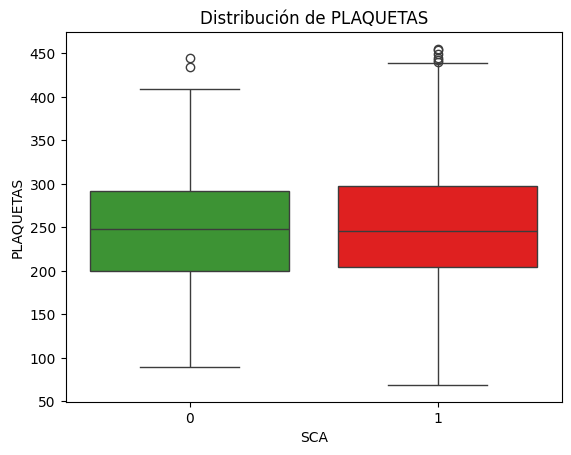

In [ ]:
sns.boxplot(data=df,x='SCA',y='PLAQUETAS',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de PLAQUETAS')
plt.show()

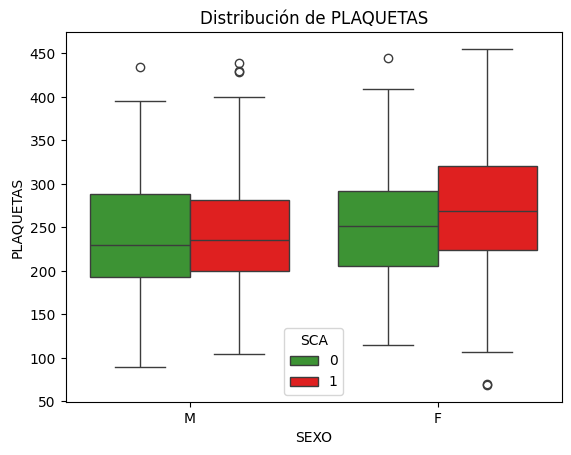

In [ ]:
sns.boxplot(data=df,x='SEXO',y='PLAQUETAS',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de PLAQUETAS')
plt.show()

### Variable Sodio

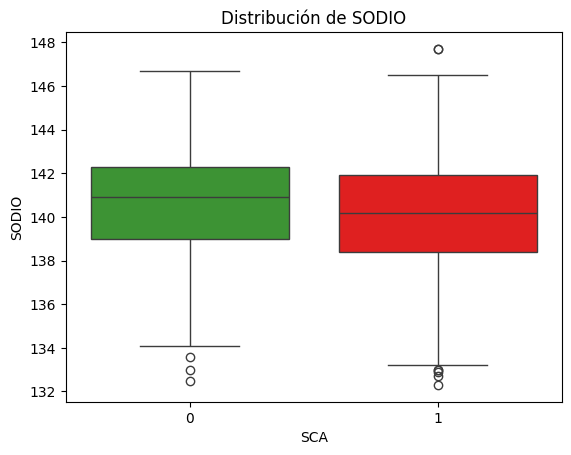

In [ ]:
sns.boxplot(data=df,x='SCA',y='SODIO',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de SODIO')
plt.show()

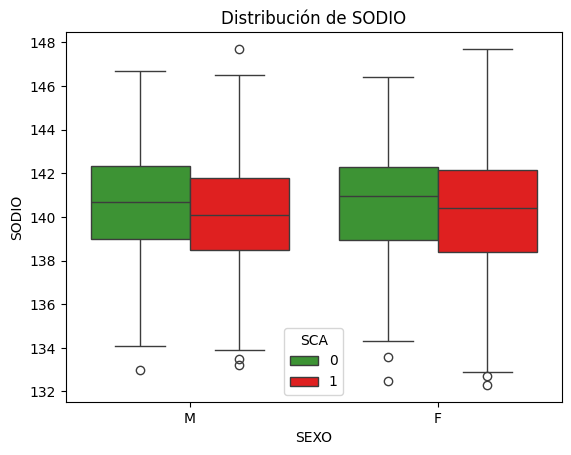

In [ ]:
sns.boxplot(data=df,x='SEXO',y='SODIO',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de SODIO')
plt.show()

### Variable Creatinina en suero

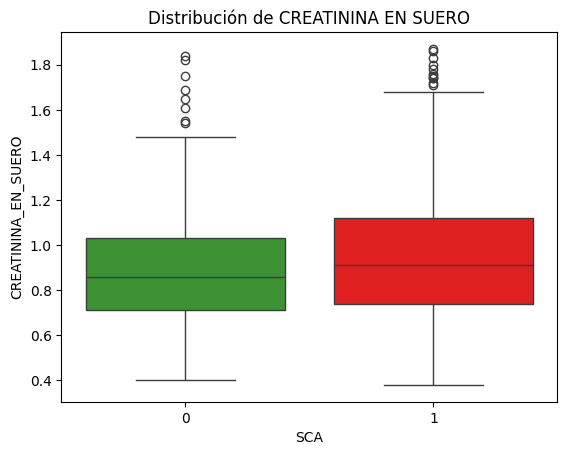

In [ ]:
sns.boxplot(data=df,x='SCA',y='CREATININA_EN_SUERO',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de CREATININA EN SUERO')
plt.show()

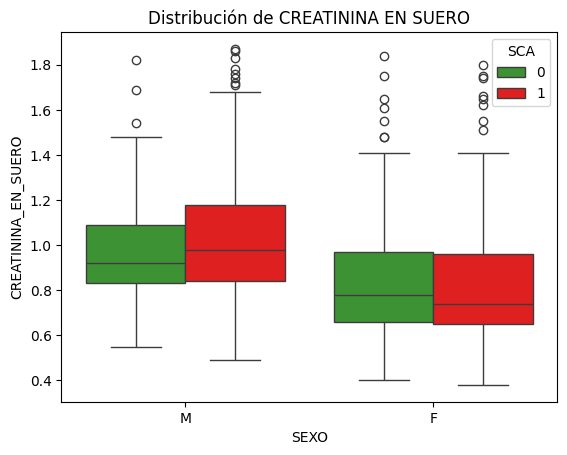

In [ ]:
sns.boxplot(data=df,x='SEXO',y='CREATININA_EN_SUERO',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de CREATININA EN SUERO')
plt.show()

### Variabale Tensión baja

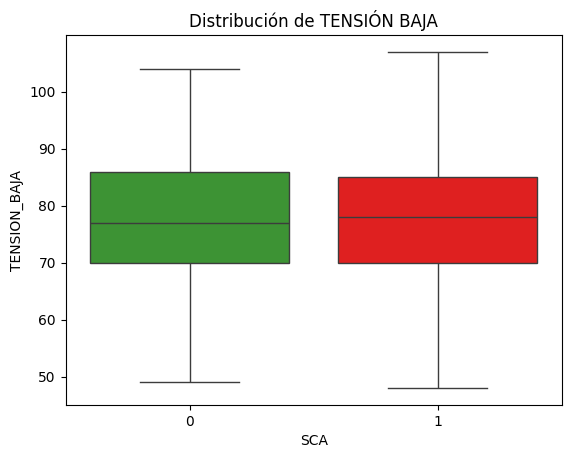

In [ ]:
sns.boxplot(data=df,x='SCA',y='TENSION_BAJA',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de TENSIÓN BAJA')
plt.show()

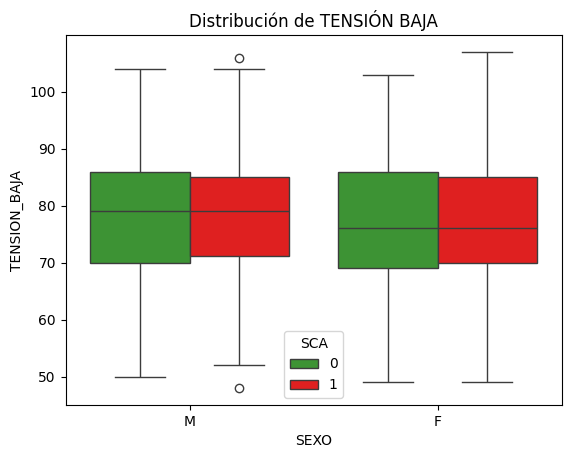

In [ ]:
sns.boxplot(data=df,x='SEXO',y='TENSION_BAJA',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de TENSIÓN BAJA')
plt.show()

### Variabale Tensión alta

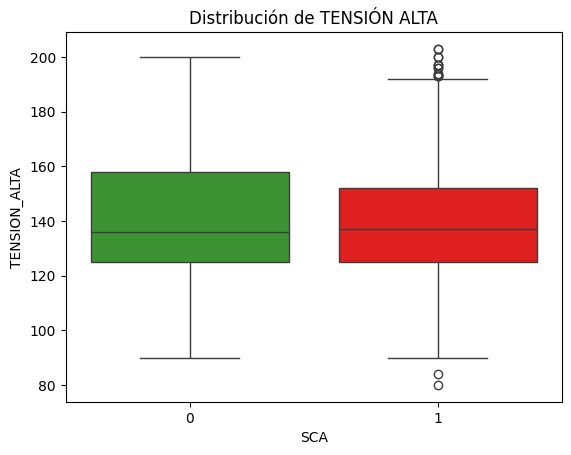

In [ ]:
sns.boxplot(data=df,x='SCA',y='TENSION_ALTA',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de TENSIÓN ALTA')
plt.show()

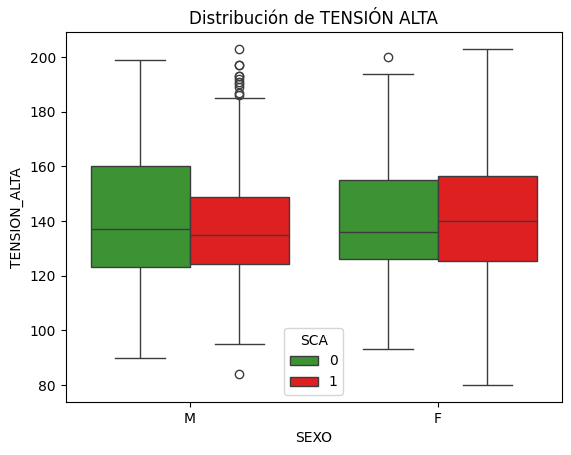

In [ ]:
sns.boxplot(data=df,x='SEXO',y='TENSION_ALTA',palette=['#30A324','red'],hue='SCA')
plt.title('Distribución de TENSIÓN ALTA')
plt.show()

### Variable Edad

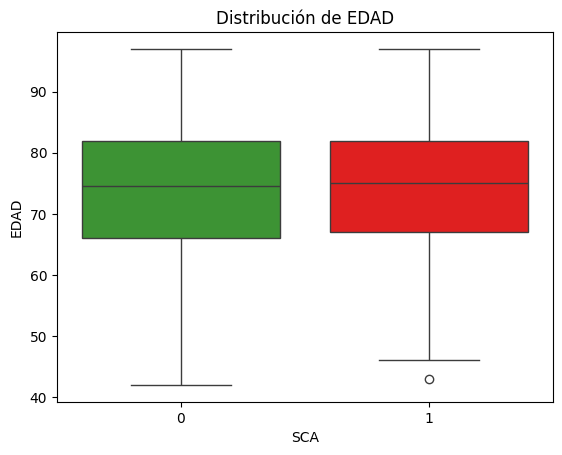

In [ ]:
sns.boxplot(data=df,x='SCA',y='EDAD',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de EDAD')
plt.show()

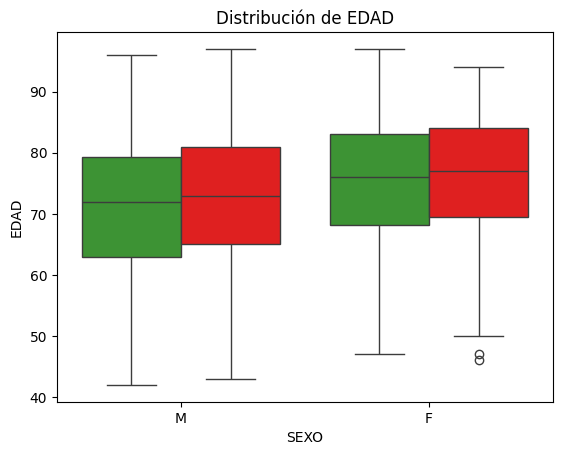

In [ ]:
sns.boxplot(data=df,x='SEXO',y='EDAD',palette=['#30A324','red'],hue='SCA',legend=False)
plt.title('Distribución de EDAD')
plt.show()

### Variable Patología coronaria

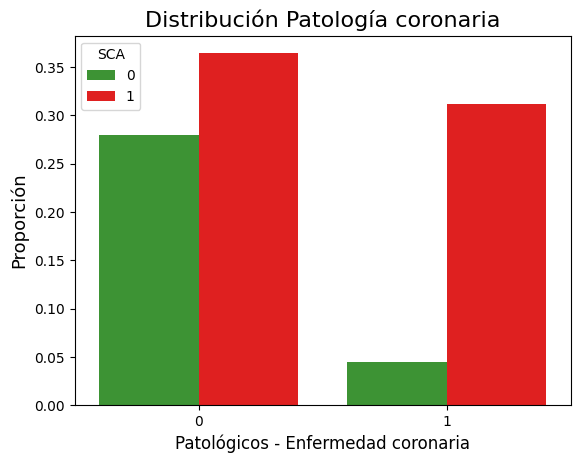

In [ ]:
sns.countplot(data=df, x='PATOLOGICOS-ENFERMEDAD_CORONARIA', hue='SCA', stat='proportion', palette=['#30A324','red'])
plt.ylabel('Proporción',fontsize=13)
plt.xlabel('Patológicos - Enfermedad coronaria',fontsize=12)
plt.title('Distribución Patología coronaria',fontsize=16)
plt.show()

## Correlaciones

Calculamos los coeficientes de correlación de pearson entre las variables numéricas continuas

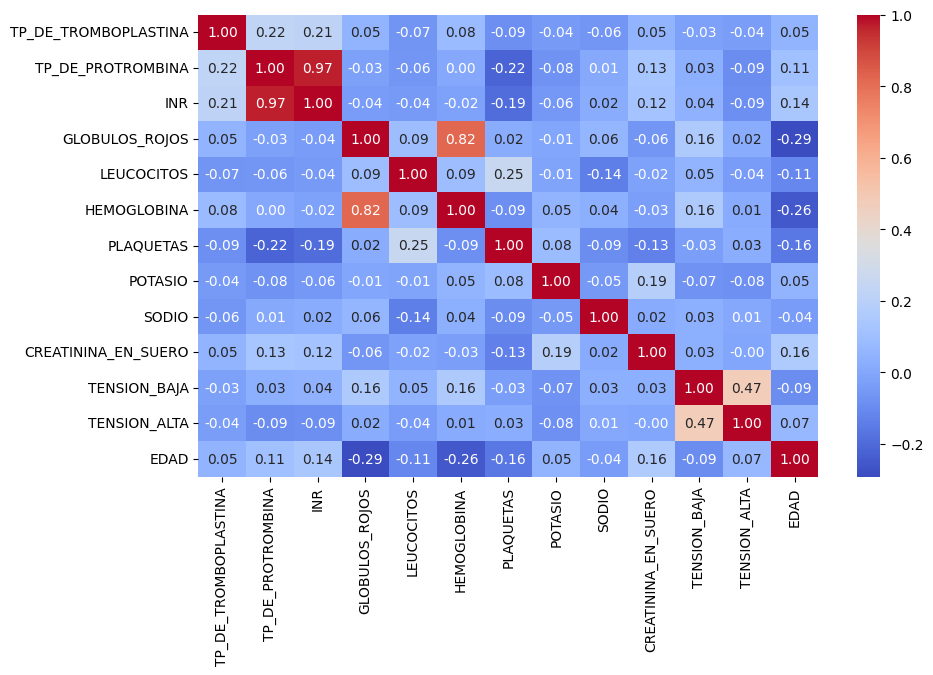

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

corr = df.iloc[:, :13].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax,)
plt.show()

# Modelos

Entrenamos:
* un xgboost con las variables originales
* un xgboost con componentes principales
* una regresión logistica con componentes principales
* un random forest con componentes principales

## XGboost (variables originales)

In [ ]:
df.head()

,TP_DE_TROMBOPLASTINA,TP_DE_PROTROMBINA,INR,GLOBULOS_ROJOS,LEUCOCITOS,HEMOGLOBINA,PLAQUETAS,POTASIO,SODIO,CREATININA_EN_SUERO,...,PATOLOGICOS-ENFERMEDAD_CORONARIA,PATOLOGICOS-DISLIPIDEMIA,PATOLOGICOS-TABAQUISMO,PATOLOGICOS-OBESIDAD,PATOLOGICOS-H.T.A,PATOLOGICOS-DIABETES,PATOLOGICOS-TRASTORNOS_PULMONARES,PATOLOGICOS-INSUFICIENCIA_RENAL,TOXICOS-TOXICO_TIPO_1,SCA
0,27.7,11.7,1.08,4.85,11.28,14.4,253.0,3.41,141.2,1.10,...,1,1,1,0,1,1,0,0,0,1
1,27.4,11.0,1.01,4.42,6.87,11.8,211.0,4.11,139.8,0.82,...,0,0,0,0,1,0,0,0,0,0
2,28.5,12.0,1.11,5.92,7.24,16.9,219.0,3.71,139.9,0.75,...,1,1,0,0,1,1,0,0,0,1
3,30.4,11.2,1.04,4.61,9.71,13.8,341.0,4.09,140.0,0.73,...,1,1,0,0,1,0,0,0,0,1
4,25.2,10.7,1.02,5.39,11.23,17.6,270.0,4.10,140.0,0.93,...,1,1,1,1,1,0,0,0,0,1


In [ ]:
X = df.drop(columns=['SCA'])  # Predictores
y = df['SCA']                 # Objetivo

### Separamos en entrenamiento, validación y prueba

In [ ]:
# Separamos 70% para entrenamiento
X_train, X_val_test, y_train, y_val_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# Separamos el 30% restante en validacion y prueba
X_val, X_test, y_val, y_test = train_test_split(X_val_test,y_val_test,test_size=0.5,random_state=42,stratify=y_val_test)

Clasificamos las variables en numéricas, binarias y categóricas para procesarlas

In [ ]:
num_cols = df.select_dtypes(include='float').columns.tolist()
cat_cols = ['SEXO']
bin_cols = df.select_dtypes(include='int').columns.tolist()

bin_cols.remove('SCA')

Realizamos para este modelo solo un preprocesamiento sobre la categoría SEXO

In [ ]:
preprocessor_xgb_simple = ColumnTransformer([
        ('num', 'passthrough', num_cols),
        ('bin', 'passthrough', bin_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

### Entrenamos el modelo

In [ ]:
ratio = (y_train == 0).sum() / (y_train == 1).sum()
pipeline_xgb_simple = Pipeline([
    ('preprocessor', preprocessor_xgb_simple),
    ('classifier', XGBClassifier(eval_metric='logloss', scale_pos_weight=ratio))
])

pipeline_xgb_simple.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['TP_DE_TROMBOPLASTINA',
                                                   'TP_DE_PROTROMBINA', 'INR',
                                                   'GLOBULOS_ROJOS',
                                                   'LEUCOCITOS', 'HEMOGLOBINA',
                                                   'PLAQUETAS', 'POTASIO',
                                                   'SODIO',
                                                   'CREATININA_EN_SUERO',
                                                   'TENSION_BAJA',
                                                   'TENSION_ALTA', 'EDAD']),
                                                 ('bin', 'passthrough',
                                                  ['PATOLOGICOS-ENFERMEDAD_CORONARIA',
                                                   'PATOLOGICOS-DISLIPIDEM...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

### Evaluamos en el validation-set

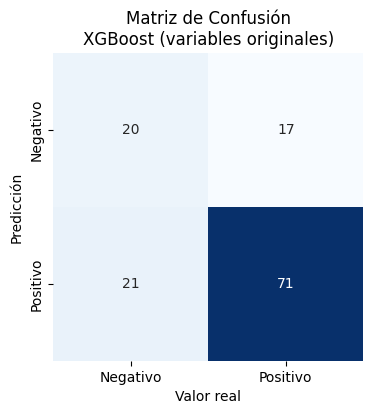

In [ ]:
y_pred_val = pipeline_xgb_simple.predict(X_val)
cm_var_org = confusion_matrix(y_val, y_pred_val).T   # Predicciones como filas

plt.figure(figsize=(4,4))
labels = ['Negativo', 'Positivo']
sns.heatmap(cm_var_org, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión\nXGBoost (variables originales)')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.54      0.49      0.51        41
           1       0.77      0.81      0.79        88

    accuracy                           0.71       129
   macro avg       0.66      0.65      0.65       129
weighted avg       0.70      0.71      0.70       129



## PCA

Realizamos PCA sobre las variables numéricas del conjunto de entrenamiento.

In [ ]:
idx_train = X_train.index       # Indices conjunto de entrenamiento
df_pca = df.loc[idx_train,num_cols]
df_pca.head()

,TP_DE_TROMBOPLASTINA,TP_DE_PROTROMBINA,INR,GLOBULOS_ROJOS,LEUCOCITOS,HEMOGLOBINA,PLAQUETAS,POTASIO,SODIO,CREATININA_EN_SUERO,TENSION_BAJA,TENSION_ALTA,EDAD
528,22.8,10.4,0.96,5.40,8.36,16.9,320.0,3.97,141.8,0.47,80.0,130.0,61.0
573,25.2,12.0,1.12,5.54,6.60,15.9,273.0,4.37,139.5,1.18,84.0,140.0,55.0
494,26.9,11.0,1.02,4.77,10.13,13.9,370.0,4.14,141.8,0.49,65.0,188.0,75.0
278,23.5,10.2,0.96,4.54,8.77,11.4,242.0,4.86,139.8,1.41,75.0,125.0,76.0
724,27.1,11.9,1.10,5.22,10.39,14.1,225.0,3.61,139.6,0.54,60.0,101.0,57.0


In [ ]:
# Estandarizamos, pues PCA es sensible a escalas
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# Calculamos las componentes principales
pca = PCA(random_state=42)
data_pca = pca.fit_transform(df_pca_scaled)

# Dataframe con las componentes
data_pca = pd.DataFrame(data = data_pca, columns = [f'PC{i}' for i in range(1,data_pca.shape[1]+1)])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,-3.479298,-0.022446,-0.476065,-0.515907,-1.384500,-0.559971,0.144157,-0.830280,0.514567,0.252151,-0.411774,0.516785,0.034157
1,-0.260228,2.263276,-0.181690,0.023894,0.578712,-0.811834,0.443432,-1.420733,-1.187590,1.213846,0.230581,-0.120862,0.050984
2,-1.296513,-0.908318,0.146928,-1.706548,-0.154452,-0.304393,0.830082,0.658963,1.489694,0.092679,2.003774,-0.021251,0.127364
3,-0.668972,-2.717120,-0.074979,1.752215,1.536368,-1.167908,-0.383274,-0.238717,-0.739080,-0.080600,-0.402143,-0.926145,-0.144935
4,0.338959,0.910130,-2.490800,-1.229381,-1.916002,-0.017663,-0.941119,-0.920805,-0.470108,-0.228330,0.566532,-0.586250,0.161565


Visualizamos los gráficos de varianza explicada.

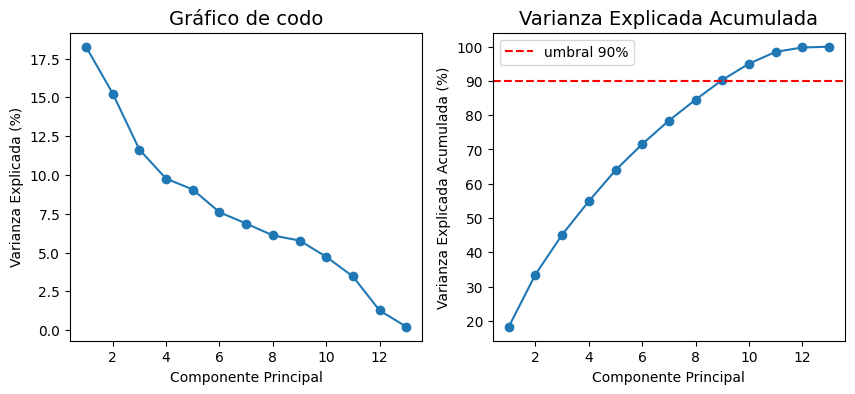

In [ ]:
variance_ratio = pca.explained_variance_ratio_ * 100

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
# gráfico de codo
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio, marker='o')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada (%)')
plt.title('Gráfico de codo',fontsize=14)

plt.subplot(1,2,2)
# gráfico de varianza acumulada
cumulative_variance = np.cumsum(variance_ratio)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(90, linestyle='--', label='umbral 90%',c='red')
plt.xlabel('Componente Principal')
plt.ylabel('Varianza Explicada Acumulada (%)')
plt.title('Varianza Explicada Acumulada',fontsize=14)
plt.legend()
plt.show()

Calculamos las correlaciones de las variables originales con las componentes.

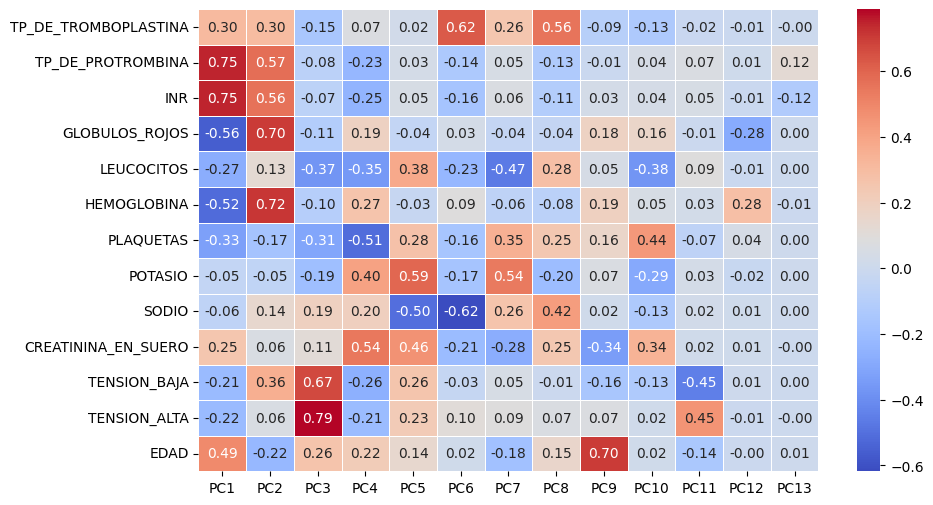

In [ ]:
V = pca.components_               # Matriz de vectores propios (como filas)
Lambda = pca.explained_variance_  # Valores propios asociados a cada vector propio

# Coeficientes de correlación
correlations = V * np.sqrt(Lambda[:, np.newaxis])

# DataFrame con las correlaciones
df_corr = pd.DataFrame(correlations.T,
                       index = df_pca.columns,
                       columns = [f'PC{i+1}' for i in range(V.shape[0])])

plt.figure(figsize=(10, 6))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
#plt.title("Correlación entre Variables Originales y Componentes Principales\n")
plt.show()

## XGBoost (PCA)

Realizamos el pre-procesamiento

In [ ]:
numerical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10,random_state=42))
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor_pca = ColumnTransformer([
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols),
        ('bin', 'passthrough', bin_cols)
])

### Entrenamos el modelo

In [ ]:
pipeline_xgb_pca = Pipeline([
    ('preprocessor', preprocessor_pca),
    ('classifier', XGBClassifier(eval_metric='logloss',scale_pos_weight=ratio))
])

pipeline_xgb_pca.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=10,
                                                                       random_state=42))]),
                                                  ['TP_DE_TROMBOPLASTINA',
                                                   'TP_DE_PROTROMBINA', 'INR',
                                                   'GLOBULOS_ROJOS',
                                                   'LEUCOCITOS', 'HEMOGLOBINA',
                                                   'PLAQUETAS', 'POTASIO',
                                                   'SODIO',
                                                   'CREATININA_EN_SUER...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

### Evaluamos en el validation-set

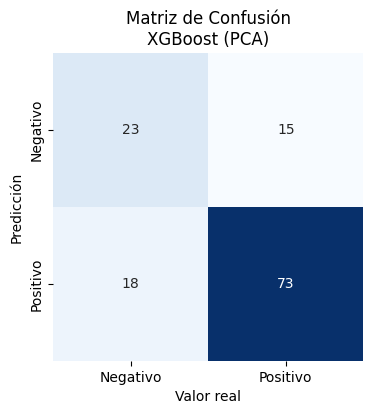

In [ ]:
y_pred_val = pipeline_xgb_pca.predict(X_val)
cm = confusion_matrix(y_val, y_pred_val).T   # Predicciones como filas

plt.figure(figsize=(4,4))
labels = ['Negativo', 'Positivo']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión\nXGBoost (PCA)')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.61      0.56      0.58        41
           1       0.80      0.83      0.82        88

    accuracy                           0.74       129
   macro avg       0.70      0.70      0.70       129
weighted avg       0.74      0.74      0.74       129



### Comparación XGBoost [variables_originales] y XGBoost [PCA]

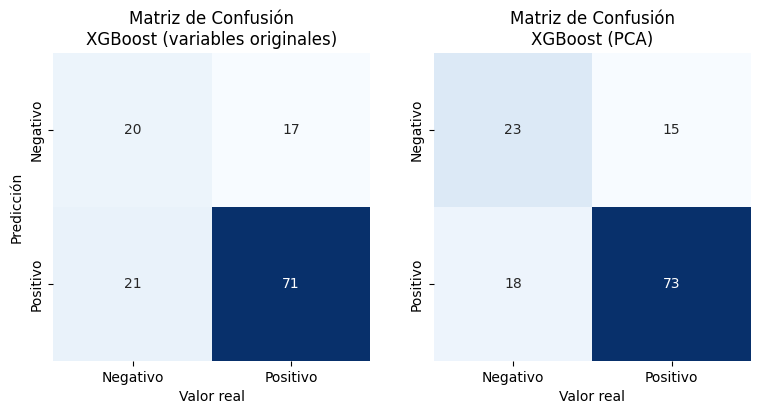

In [ ]:
plt.figure(figsize=(9,4))
labels = ['Negativo', 'Positivo']

plt.subplot(1,2,1)
sns.heatmap(cm_var_org, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión\nXGBoost (variables originales)')

plt.subplot(1,2,2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel(' ')
plt.title('Matriz de Confusión\nXGBoost (PCA)')
plt.show()


Dado que los resultados son mejores para los datos transformados con PCA, ajustaremos el umbral de clasificación con el conjunto de validación sobre este modelo (XGBoost+PCA).

### Ajustamos el umbral con el conjunto de validación

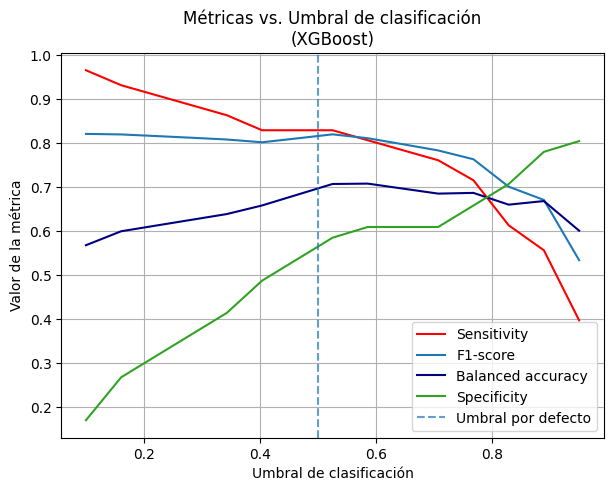

In [ ]:
probs_val = pipeline_xgb_pca.predict_proba(X_val)[:,1]
umbrales = np.linspace(0.1, 0.95, 15)

f1, sens, spec, bal_acc = [], [], [], []
for t in umbrales:
    y_pred = (probs_val >= t).astype(int)
    f1.append(f1_score(y_val, y_pred))
    sens.append(recall_score(y_val, y_pred))
    spec.append(recall_score(y_val, y_pred, pos_label=0))
    bal_acc.append(balanced_accuracy_score(y_val, y_pred))

# Gráfico
plt.figure(figsize=(7,5))
plt.plot(umbrales, sens, label='Sensitivity', c='red')
plt.plot(umbrales, f1, label='F1-score')
plt.plot(umbrales, bal_acc, label='Balanced accuracy',c='navy')
plt.plot(umbrales, spec, label='Specificity', c='#30A324')
plt.axvline(0.5, linestyle='--', alpha=0.7, label='Umbral por defecto')
plt.xlabel('Umbral de clasificación')
plt.ylabel('Valor de la métrica')
plt.title('Métricas vs. Umbral de clasificación\n(XGBoost)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
ths = np.linspace(0, 1, 100)
scores = [balanced_accuracy_score(y_val, probs_val >= t) for t in ths]

t_xgb = float(ths[int(np.argmax(scores))])
print(f'Máximo Balanced accuracy: {round(max(scores),2)} con umbral: {round(t_xgb,3)}')

Máximo Balanced accuracy: 0.71 con umbral: 0.586


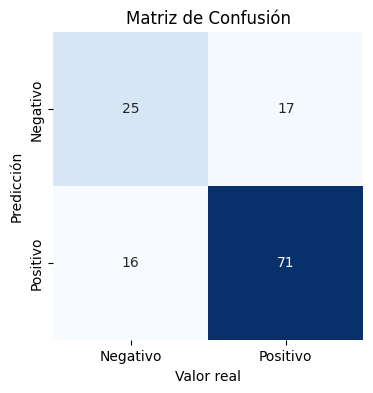

In [ ]:
y_pred_val = (probs_val > t_xgb).astype(int)
# Evaluamos en el validation set con el umbral que maximiza el F1
cm_xgb_pca_val = confusion_matrix(y_val, y_pred_val).T   # Predicciones como filas

plt.figure(figsize=(4,4))
labels = ['Negativo', 'Positivo']
sns.heatmap(cm_xgb_pca_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

           0       0.60      0.61      0.60        41
           1       0.82      0.81      0.81        88

    accuracy                           0.74       129
   macro avg       0.71      0.71      0.71       129
weighted avg       0.75      0.74      0.74       129



## Regresión Logística

In [ ]:
pipeline_LR = Pipeline([
    ('preprocessor', clone(preprocessor_pca)),
    ('classifier', LogisticRegression(C=0.5,class_weight='balanced',random_state=42))
])

pipeline_LR.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=10,
                                                                       random_state=42))]),
                                                  ['TP_DE_TROMBOPLASTINA',
                                                   'TP_DE_PROTROMBINA', 'INR',
                                                   'GLOBULOS_ROJOS',
                                                   'LEUCOCITOS', 'HEMOGLOBINA',
                                                   'PLAQUETAS', 'POTASIO',
                                                   'SODIO',
                                                   'CREATININA_EN_SUER...
                                                 ('bin', 'passthrough',
                                                  ['PATOLOGICOS-ENFERMEDAD_CORONARIA',
                                                   'PATOLOGICOS-DISLIPIDEMIA',
                                                   'PATOLOGICOS-TABAQUISMO',
                                                   'PATOLOGICOS-OBESIDAD',
                                                   'PATOLOGICOS-H.T.A',
                                                   'PATOLOGICOS-DIABETES',
                                                   'PATOLOGICOS-TRASTORNOS_PULMONARES',
                                                   'PATOLOGICOS-INSUFICIENCIA_RENAL',
                                                   'TOXICOS-TOXICO_TIPO_1'])])),
                ('classifier',
                 LogisticRegression(C=0.5, class_weight='balanced',
                                    random_state=42))])

### Evaluamos en el validation-set

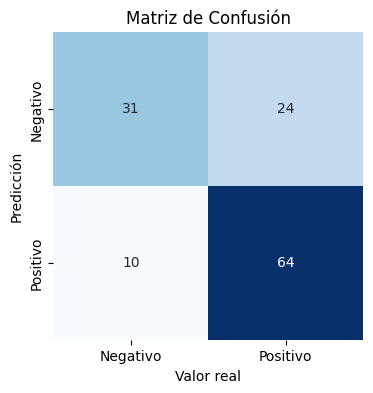

In [ ]:
y_pred_val_LR = pipeline_LR.predict(X_val)    # umbral por defecto 0.5

cm = confusion_matrix(y_val, y_pred_val_LR).T   # Predicciones como filas

plt.figure(figsize=(4,4))
labels = ['Negativo', 'Positivo']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(classification_report(y_val,y_pred_val_LR))

              precision    recall  f1-score   support

           0       0.56      0.76      0.65        41
           1       0.86      0.73      0.79        88

    accuracy                           0.74       129
   macro avg       0.71      0.74      0.72       129
weighted avg       0.77      0.74      0.74       129



### Ajustamos el umbral con el conjunto de validación

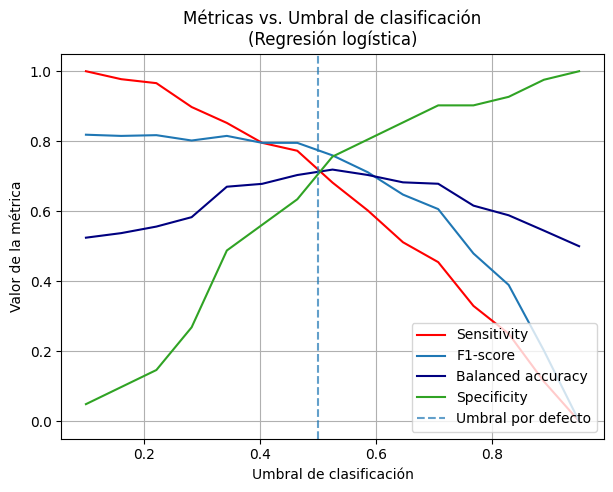

In [ ]:
probs_val_LR = pipeline_LR.predict_proba(X_val)[:,1]
umbrales = np.linspace(0.1, 0.95, 15)

f1_lr, sens_lr, spec_lr, bal_acc_lr = [], [], [], []
for t in umbrales:
    y_pred_val = (probs_val_LR >= t).astype(int)
    f1_lr.append(f1_score(y_val, y_pred_val))
    sens_lr.append(recall_score(y_val, y_pred_val))
    spec_lr.append(recall_score(y_val, y_pred_val, pos_label=0))
    bal_acc_lr.append(balanced_accuracy_score(y_val, y_pred_val))

# Gráfico
plt.figure(figsize=(7,5))
plt.plot(umbrales, sens_lr, label='Sensitivity', c='red')
plt.plot(umbrales, f1_lr, label='F1-score')
plt.plot(umbrales, bal_acc_lr, label='Balanced accuracy', c='navy')
plt.plot(umbrales, spec_lr, label='Specificity', c='#30A324')
plt.axvline(0.5, linestyle='--', alpha=0.7, label='Umbral por defecto')
plt.xlabel('Umbral de clasificación')
plt.ylabel('Valor de la métrica')
plt.title('Métricas vs. Umbral de clasificación\n(Regresión logística)')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

Seleccionamos el umbral que maximiza el balanced accuracy

In [ ]:
ths = np.linspace(0, 1, 100)
scores = [balanced_accuracy_score(y_val, probs_val_LR >= t) for t in ths]

t_lr = float(ths[int(np.argmax(scores))])
print(f'Máximo Balanced accuracy: {round(max(scores),2)} con umbral: {round(t_lr,3)}')

Máximo Balanced accuracy: 0.75 con umbral: 0.485


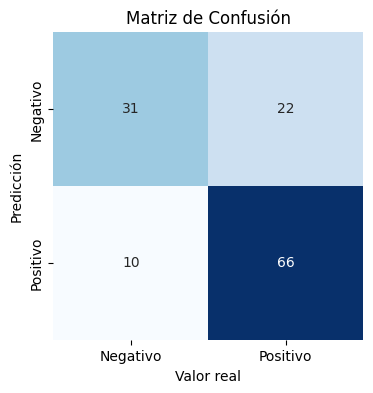

In [ ]:
# Evaluamos en el conjunto de validación
y_pred_val_LR = (probs_val_LR > t_lr).astype(int)

cm_lr_val = confusion_matrix(y_val, y_pred_val_LR).T   # Predicciones como filas

plt.figure(figsize=(4,4))
labels = ['Negativo', 'Positivo']
sns.heatmap(cm_lr_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred_val_LR))

              precision    recall  f1-score   support

           0       0.58      0.76      0.66        41
           1       0.87      0.75      0.80        88

    accuracy                           0.75       129
   macro avg       0.73      0.75      0.73       129
weighted avg       0.78      0.75      0.76       129



## Random Forest

In [ ]:
pipeline_RF = Pipeline([
    ('preprocessor', clone(preprocessor_pca)),
    ('classifier', RandomForestClassifier(class_weight='balanced',random_state=42))
])

pipeline_RF.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components=10,
                                                                       random_state=42))]),
                                                  ['TP_DE_TROMBOPLASTINA',
                                                   'TP_DE_PROTROMBINA', 'INR',
                                                   'GLOBULOS_ROJOS',
                                                   'LEUCOCITOS', 'HEMOGLOBINA',
                                                   'PLAQUETAS', 'POTASIO',
                                                   'SODIO',
                                                   'CREATININA_EN_SUER...
                                                 ('bin', 'passthrough',
                                                  ['PATOLOGICOS-ENFERMEDAD_CORONARIA',
                                                   'PATOLOGICOS-DISLIPIDEMIA',
                                                   'PATOLOGICOS-TABAQUISMO',
                                                   'PATOLOGICOS-OBESIDAD',
                                                   'PATOLOGICOS-H.T.A',
                                                   'PATOLOGICOS-DIABETES',
                                                   'PATOLOGICOS-TRASTORNOS_PULMONARES',
                                                   'PATOLOGICOS-INSUFICIENCIA_RENAL',
                                                   'TOXICOS-TOXICO_TIPO_1'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

### Evaluamos en el Validation-Set

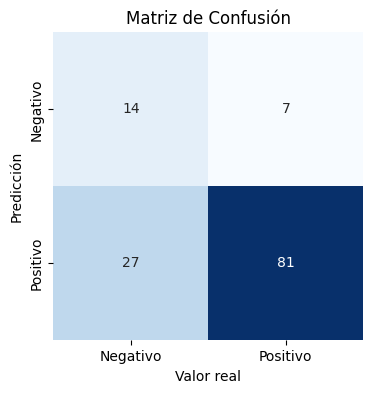

In [ ]:
y_pred_val_RF = pipeline_RF.predict(X_val)      # umbral 0.5

cm = confusion_matrix(y_val, y_pred_val_RF).T   # Predicciones como filas

plt.figure(figsize=(4,4))
labels = ['Negativo', 'Positivo']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred_val_RF))

              precision    recall  f1-score   support

           0       0.67      0.34      0.45        41
           1       0.75      0.92      0.83        88

    accuracy                           0.74       129
   macro avg       0.71      0.63      0.64       129
weighted avg       0.72      0.74      0.71       129



### Ajustamos el umbral con el conjunto de validación

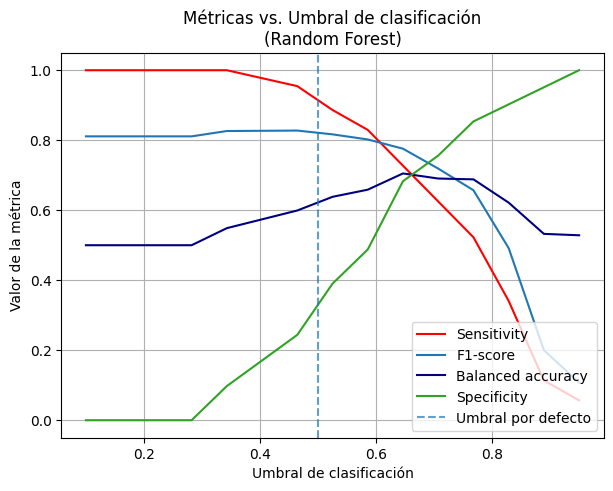

In [ ]:
probs_val_RF = pipeline_RF.predict_proba(X_val)[:,1]
umbrales = np.linspace(0.1, 0.95, 15)

f1_rf, sens_rf, spec_rf, bal_acc_rf = [], [], [], []
for t in umbrales:
    y_pred_val = (probs_val_RF >= t).astype(int)
    f1_rf.append(f1_score(y_val, y_pred_val))
    sens_rf.append(recall_score(y_val, y_pred_val))
    spec_rf.append(recall_score(y_val, y_pred_val, pos_label=0))
    bal_acc_rf.append(balanced_accuracy_score(y_val, y_pred_val))

# Gráfico
plt.figure(figsize=(7,5))
plt.plot(umbrales, sens_rf, label='Sensitivity', c='red')
plt.plot(umbrales, f1_rf, label='F1-score')
plt.plot(umbrales, bal_acc_rf, label='Balanced accuracy', c='navy')
plt.plot(umbrales, spec_rf, label='Specificity', c='#30A324')
plt.axvline(0.5, linestyle='--', alpha=0.7, label='Umbral por defecto')
plt.xlabel('Umbral de clasificación')
plt.ylabel('Valor de la métrica')
plt.title('Métricas vs. Umbral de clasificación\n(Random Forest)')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

In [ ]:
ths = np.linspace(0, 1, 100)
scores = [balanced_accuracy_score(y_val, probs_val_RF >= t) for t in ths]

t_rf = float(ths[int(np.argmax(scores))])
print(f'Máximo Balanced accuracy: {round(max(scores),2)} con umbral: {round(t_rf,3)}')

Máximo Balanced accuracy: 0.73 con umbral: 0.636


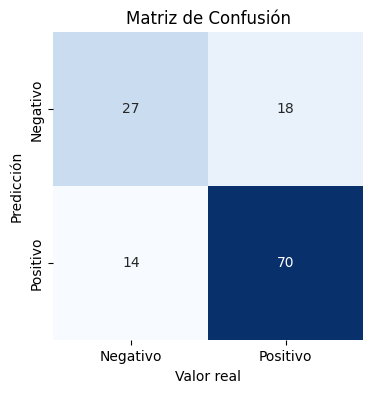

In [ ]:
# Evaluamos en el conjunto de validación
y_pred_val_RF = (probs_val_RF > t_rf).astype(int)  # mejor umbral según balanced accuracy

cm_rf_val = confusion_matrix(y_val, y_pred_val_RF).T   # Predicciones como filas

plt.figure(figsize=(4,4))
labels = ['Negativo', 'Positivo']
sns.heatmap(cm_rf_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(classification_report(y_val, y_pred_val_RF))

              precision    recall  f1-score   support

           0       0.60      0.66      0.63        41
           1       0.83      0.80      0.81        88

    accuracy                           0.75       129
   macro avg       0.72      0.73      0.72       129
weighted avg       0.76      0.75      0.75       129



### Gráfico conjunto puntos de corte Logístico y Random Forest

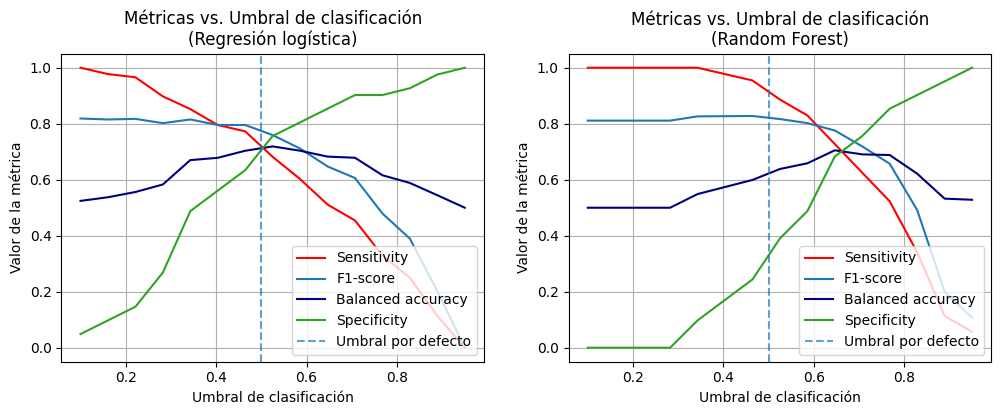

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
umbrales = np.linspace(0.1, 0.95, 15)
plt.plot(umbrales, sens_lr, label='Sensitivity', c='red')
plt.plot(umbrales, f1_lr, label='F1-score')
plt.plot(umbrales, bal_acc_lr, label='Balanced accuracy', c='navy')
plt.plot(umbrales, spec_lr, label='Specificity', c='#30A324')
plt.axvline(0.5, linestyle='--', alpha=0.7, label='Umbral por defecto')
plt.xlabel('Umbral de clasificación')
plt.ylabel('Valor de la métrica')
plt.title('Métricas vs. Umbral de clasificación\n(Regresión logística)')
plt.legend(loc = 'lower right')
plt.grid(True)

plt.subplot(1,2,2)
umbrales = np.linspace(0.1, 0.95, 15)
plt.plot(umbrales, sens_rf, label='Sensitivity', c='red')
plt.plot(umbrales, f1_rf, label='F1-score')
plt.plot(umbrales, bal_acc_rf, label='Balanced accuracy', c='navy')
plt.plot(umbrales, spec_rf, label='Specificity', c='#30A324')
plt.axvline(0.5, linestyle='--', alpha=0.7, label='Umbral por defecto')
plt.xlabel('Umbral de clasificación')
plt.ylabel('Valor de la métrica')
plt.title('Métricas vs. Umbral de clasificación\n(Random Forest)')
plt.legend(loc = 'lower right')
plt.grid(True)
plt.show()

## Resultados en conjunto de evaluación


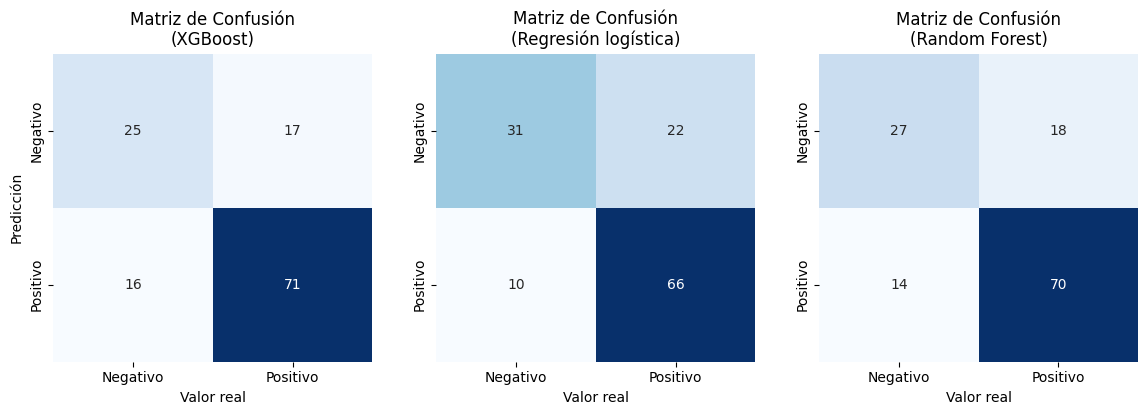

In [ ]:
plt.figure(figsize=(14,4))
labels = ['Negativo', 'Positivo']

plt.subplot(1,3,1)
sns.heatmap(cm_xgb_pca_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión\n(XGBoost)')

plt.subplot(1,3,2)
sns.heatmap(cm_lr_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel(' ')
plt.title('Matriz de Confusión\n(Regresión logística)')

plt.subplot(1,3,3)
sns.heatmap(cm_rf_val, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel(' ')
plt.title('Matriz de Confusión\n(Random Forest)')

plt.show()

# Evaluación de modelos en Test-Set

Evaluamos el xgboost, la regresión logística y el random forest con el conjunto de prueba separado en un comienzo (datos nunca vistos).

### XGBoost

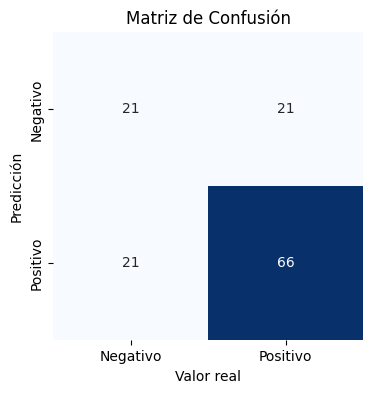

In [ ]:
probs_test = pipeline_xgb_pca.predict_proba(X_test)[:,1]
y_pred_test = (probs_test > t_xgb).astype(int)

cm1 = confusion_matrix(y_test, y_pred_test).T   # Predicciones como filas

plt.figure(figsize=(4,4))
labels = ['Negativo', 'Positivo']
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        42
           1       0.76      0.76      0.76        87

    accuracy                           0.67       129
   macro avg       0.63      0.63      0.63       129
weighted avg       0.67      0.67      0.67       129



### Regresión Logística

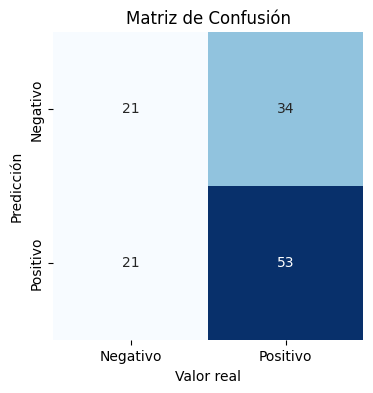

In [ ]:
probs_test_LR = pipeline_LR.predict_proba(X_test)[:,1]
y_pred_test_LR = (probs_test_LR > t_lr).astype(int)

cm2 = confusion_matrix(y_test, y_pred_test_LR).T   # Predicciones como filas

plt.figure(figsize=(4,4))
labels = ['Negativo', 'Positivo']
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test_LR))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        42
           1       0.72      0.61      0.66        87

    accuracy                           0.57       129
   macro avg       0.55      0.55      0.55       129
weighted avg       0.61      0.57      0.59       129



### Random Forest

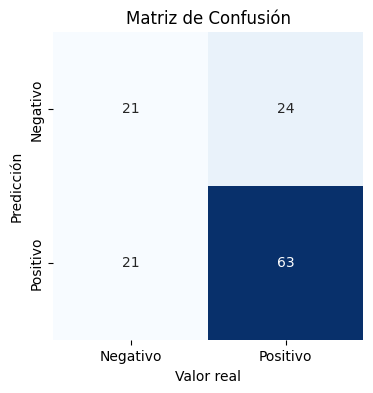

In [ ]:
probs_test_RF = pipeline_RF.predict_proba(X_test)[:,1]
y_pred_test_RF = (probs_test_RF > t_rf).astype(int)

cm3 = confusion_matrix(y_test, y_pred_test_RF).T   # Predicciones como filas

plt.figure(figsize=(4,4))
labels = ['Negativo', 'Positivo']
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test_RF))

              precision    recall  f1-score   support

           0       0.47      0.50      0.48        42
           1       0.75      0.72      0.74        87

    accuracy                           0.65       129
   macro avg       0.61      0.61      0.61       129
weighted avg       0.66      0.65      0.65       129



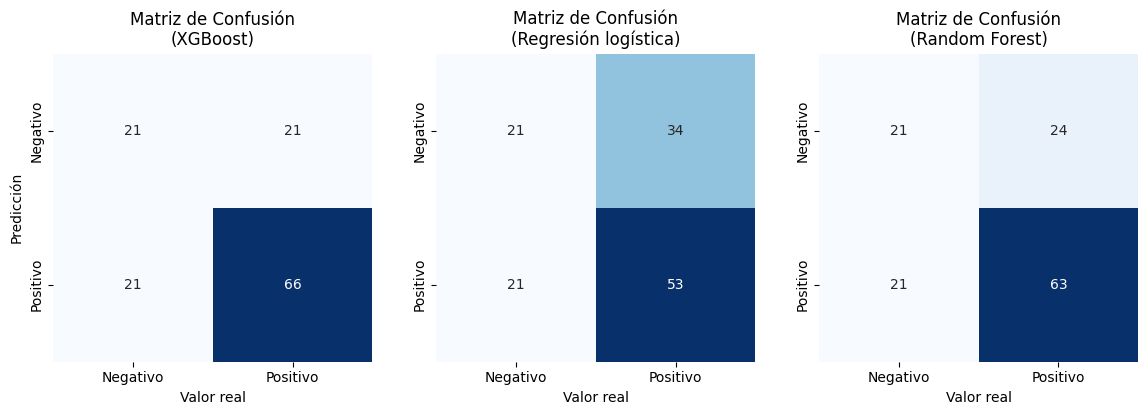

In [ ]:
plt.figure(figsize=(14,4))
labels = ['Negativo', 'Positivo']

plt.subplot(1,3,1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel('Predicción')
plt.title('Matriz de Confusión\n(XGBoost)')

plt.subplot(1,3,2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel(' ')
plt.title('Matriz de Confusión\n(Regresión logística)')

plt.subplot(1,3,3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, cbar=False)
plt.xlabel('Valor real')
plt.ylabel(' ')
plt.title('Matriz de Confusión\n(Random Forest)')

plt.show()

# Feature importance

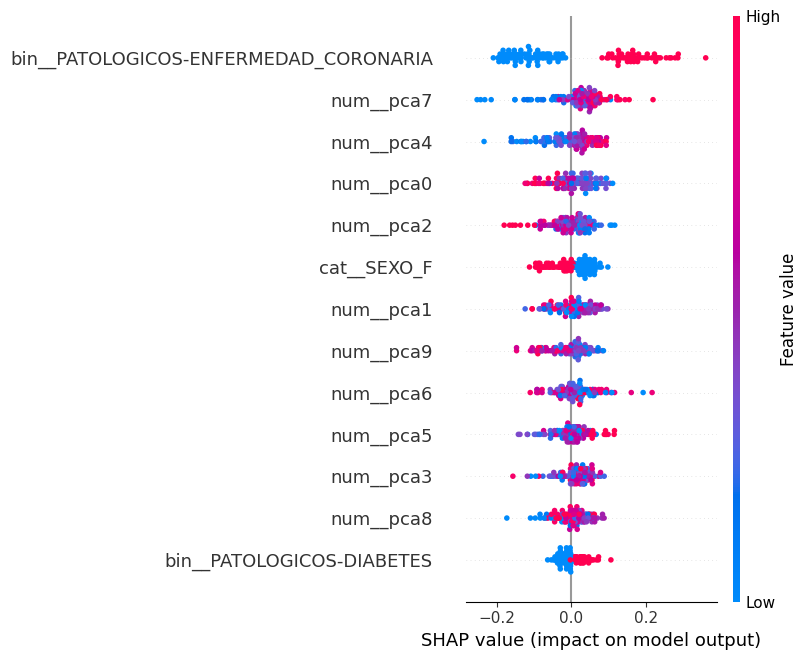

In [ ]:
pipe = pipeline_xgb_pca
model  = pipe.named_steps['classifier']

X_bg = pipe[:-1].transform(X_train)

explainer = shap.TreeExplainer(model, data=X_bg, feature_perturbation="interventional", model_output="probability")

X_exp = pipe[:-1].transform(X_test)
shap_values = explainer.shap_values(X_exp)

# Gráfico
feat_names = pipe[:-1].get_feature_names_out()
shap.summary_plot(shap_values, X_exp, feature_names=feat_names, max_display=13)
i = 0
shap.force_plot(explainer.expected_value, shap_values[i],
                X_exp[i,:] if hasattr(X_exp, "toarray") else X_exp[i],
                feature_names=feat_names)
